# Evaluation of Segmented Linear Regression

---

### Import Libraries

In [1]:
import sys
import os
root = os.path.abspath('..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from piecewise_regression import r_squared_calc


from modules import load, plots, analysis, utils

# styles
plt.style.use('seaborn-v0_8-white')

---

### Load data

In [2]:
# Inputs
#name = 'AW1D_YSI_20230826'
#name = 'AW2D_YSI_20230815'
#name = 'AW5D_YSI_20230824'
#name = 'AW6D_YSI_20230815'
#name = 'AW7D_YSI_20230814'
#name = 'BW1D_YSI_20230824'
#name = 'BW2D_YSI_20230819'
#name = 'BW3D_YSI_20230818'
#name = 'BW4D_YSI_20230816'
#name = 'BW5D_YSI_20230822'
#name = 'BW6D_YSI_20230826'
#name = 'BW7D_YSI_20230826'
#name = 'BW8D_YSI_20230823'
#name = 'BW9D_YSI_20230823'
#name = 'BW10D_YSI_20230825'
#name = 'BW11D_YSI_20230823'
#name = 'LRS33D_YSI_20230822'
#name = 'LRS69D_YSI_20230818'
## name = 'LRS70D_YSI_20230822'  por qué best BIC es cero?
## name = 'LRS75D_YSI_20230819'
#name = 'LRS79D_YSI_20230827'
#name = 'LRS81D_YSI_20230823'
#name = 'LRS89D_YSI_20230825'
name = 'LRS90D_YSI_20230827'

In [3]:
path_json = f'../data/results/{name}_results.json'

df = load.load_data(filepath=path_json, json=True)
df


,trial_1,trial_2,trial_3,trial_4,trial_5
df,"{'bic': {'0': 76623.585903623, '1': 66559.1964...","{'bic': {'0': 76623.585903623, '1': 66559.1964...","{'bic': {'0': 76623.585903623, '1': 66559.1964...","{'bic': {'0': 76623.585903623, '1': 66559.1964...","{'bic': {'0': 76623.585903623, '1': 66559.1964..."
best_n_breakpoint_bic,3,3,3,0,0
min_bic_n_breakpoint,8,5,6,9,7
best_n_breakpoint_rss,1,1,1,0,0


In [4]:
path_processed = f'../data/processed/{name}_processed.csv'

x_processed, y_processed = load.load_data(filepath=path_processed, 
                            x_col='Vertical Position [m]',
                            y_col='Corrected sp Cond [uS/cm]'
                            )

---

### Optimal `n_breakpoint`

In [5]:
trial = analysis.select_best_trial(path_json)

trial_select = df[trial[0]]
#N_BREAKPOINT = df.loc['best_n_breakpoint_bic'].mode().iloc[0] # alternative, select 'best_n_breakpoint_rss'
N_BREAKPOINT = 7

In [6]:
# Elbow plot

x_values = np.array(list(trial_select['df']['n_breakpoints'].values()))
y_values = np.array(list(trial_select['df']['bic'].values()))
secondary_x = np.array(list(trial_select['df']['n_breakpoints'].values()))
secondary_y = np.array(list(trial_select['df']['rss'].values()))

plots.plot_data(
    x_values=x_values,
    y_values=y_values,
    plot_mode='lines+markers',
    x_axis_label="Number Breakpoints",
    y_axis_label="BIC",
    secondary_x=secondary_x,
    secondary_y=secondary_y,
    use_secondary_axis=True,
    y2_axis_label="RSS",
    trace_names=['BIC', 'RSS'],
    title=name
)

---

### Evaluation

In [7]:
# Params
params_ms = utils.get_breakpoint_data(trial_select['df'], N_BREAKPOINT)
params_ms

{'bic': 52597.485230457,
 'n_breakpoints': 7,
 'estimates': {'const': {'estimate': 432.1633896254,
   'se': 21.8749330855,
   'confidence_interval': [389.2771493865, 475.0496298642],
   't_stat': 19.7561011015,
   'p_t': 3.342728198e-83},
  'beta1': {'estimate': 17215.9784709623,
   'se': 437.164623829,
   'confidence_interval': [16358.9085540767, 18073.0483878479],
   't_stat': 39.3809963857,
   'p_t': '-'},
  'breakpoint1': {'estimate': 14.1617848836,
   'se': 0.0066484238,
   'confidence_interval': [14.1487505169, 14.1748192503],
   't_stat': '-',
   'p_t': '-'},
  'beta2': {'estimate': -16226.9926836448,
   'se': 437.5305471756,
   'confidence_interval': [-17084.78000051, -15369.2053667797],
   't_stat': -37.0876794509,
   'p_t': '-'},
  'breakpoint2': {'estimate': 14.6029896752,
   'se': 0.0069828378,
   'confidence_interval': [14.5892996831, 14.6166796672],
   't_stat': '-',
   'p_t': '-'},
  'beta3': {'estimate': 2953.2384350101,
   'se': 37.0148338429,
   'confidence_interval':

In [8]:
# Model Select
ms = utils.rebuild_model(x_processed,y_processed,params_ms)
ms

In [9]:
# Globals
RSS, TSS, R2, R2_ajus = r_squared_calc.get_r_squared(y_processed, 
                                                    ms.predict(x_processed), 
                                                    len(ms.get_params()))


print("RSS: ", RSS)
print("TSS: ", TSS)
print("R2: ", R2)
print("R2_ajus: ", R2_ajus)

RSS:  889741541.7554256
TSS:  1163013958153.4927
R2:  0.9992349691630803
R2_ajus:  0.9992306591301963


In [10]:
# Per segment
metric_per_segment = analysis.calculate_metrics_per_segment(ms)
metric_per_segment

[{'Segment': 1,
  'R^2': np.float64(0.3037226259063984),
  'RMS%': np.float64(24.991894454834707),
  'RMS% (min-max)': np.float64(16.334197711297325)},
 {'Segment': 2,
  'R^2': np.float64(0.9438990691451654),
  'RMS%': np.float64(14.847493689794527),
  'RMS% (min-max)': np.float64(8.979511389884074)},
 {'Segment': 3,
  'R^2': np.float64(0.9647565414155934),
  'RMS%': np.float64(2.016782275731963),
  'RMS% (min-max)': np.float64(4.921404871003262)},
 {'Segment': 4,
  'R^2': np.float64(0.974666564358715),
  'RMS%': np.float64(2.88800102825818),
  'RMS% (min-max)': np.float64(4.496523421185931)},
 {'Segment': 5,
  'R^2': np.float64(0.982201157563862),
  'RMS%': np.float64(0.16266067404582593),
  'RMS% (min-max)': np.float64(3.279958346133433)},
 {'Segment': 6,
  'R^2': np.float64(0.9721350943665524),
  'RMS%': np.float64(0.4363640438849932),
  'RMS% (min-max)': np.float64(5.221800022438336)},
 {'Segment': 7,
  'R^2': np.float64(0.9669649053130753),
  'RMS%': np.float64(2.898983523261899),

In [11]:
# Breakpoints
breakpoints = analysis.extract_breakpoints(ms)
breakpoints

,Breakpoint X Position,Breakpoint Y Position,Confidence Interval (X)
1,14.161785,1181.829599,"(14.14875051688652, 14.174819250348945)"
2,14.602990,8800.957345,"(14.589299683082443, 14.616679667236648)"
3,18.049920,12392.388995,"(18.012851385385886, 18.08698926870413)"
4,20.476297,22086.150654,"(20.423951681833383, 20.528641537108623)"
5,21.786391,23056.195387,"(21.710026807755117, 21.86275483676309)"
6,22.338111,25295.097399,"(22.28973125884911, 22.386490047153046)"
7,24.507066,44289.781036,"(24.484452509219167, 24.529678652956314)"


##

---

### Final results

#### General models

In [12]:
# Visualizamos los datos procesados junto con los modelos obtenidos
df_ms = pd.DataFrame({'n_breakpoints': trial_select['df']['n_breakpoints'], 
                    'estimates': trial_select['df']['estimates']})

plots.interactive_segmented_regression(x=x_processed, y=y_processed, df=df_ms, title=name)

interactive(children=(IntSlider(value=2, description='n_breakpoints', max=10), Output()), _dom_classes=('widge…

#### Models per segment

In [13]:
segments = utils.extract_segments(ms)   
segments

{'segments': [{'segment': 1,
   'data_x': array([1.0000e-02, 2.8000e-02, 4.7000e-02, ..., 1.4147e+01, 1.4150e+01,
          1.4153e+01], shape=(2076,)),
   'data_y': array([ 652.06392652,  653.57888188,  655.06492163, ..., 2467.95058937,
          2499.3270628 , 2531.76956522], shape=(2076,)),
   'fitted_model': {'slope': np.float64(52.93585628450877),
    'intercept': np.float64(432.16338962534513),
    'fitted_y': array([ 432.69274819,  433.6455936 ,  434.65137487, ..., 1181.04694848,
           1181.20575605, 1181.36456362], shape=(2076,))}},
  {'segment': 2,
   'data_x': array([14.173, 14.182, 14.184, 14.199, 14.205, 14.218, 14.225, 14.229,
          14.241, 14.246, 14.25 , 14.254, 14.266, 14.268, 14.27 , 14.271,
          14.273, 14.274, 14.276, 14.277, 14.282, 14.283, 14.292, 14.301,
          14.317, 14.325, 14.327, 14.332, 14.343, 14.345, 14.35 , 14.364,
          14.369, 14.372, 14.382, 14.387, 14.388, 14.398, 14.402, 14.403,
          14.405, 14.411, 14.413, 14.416, 14.423, 1

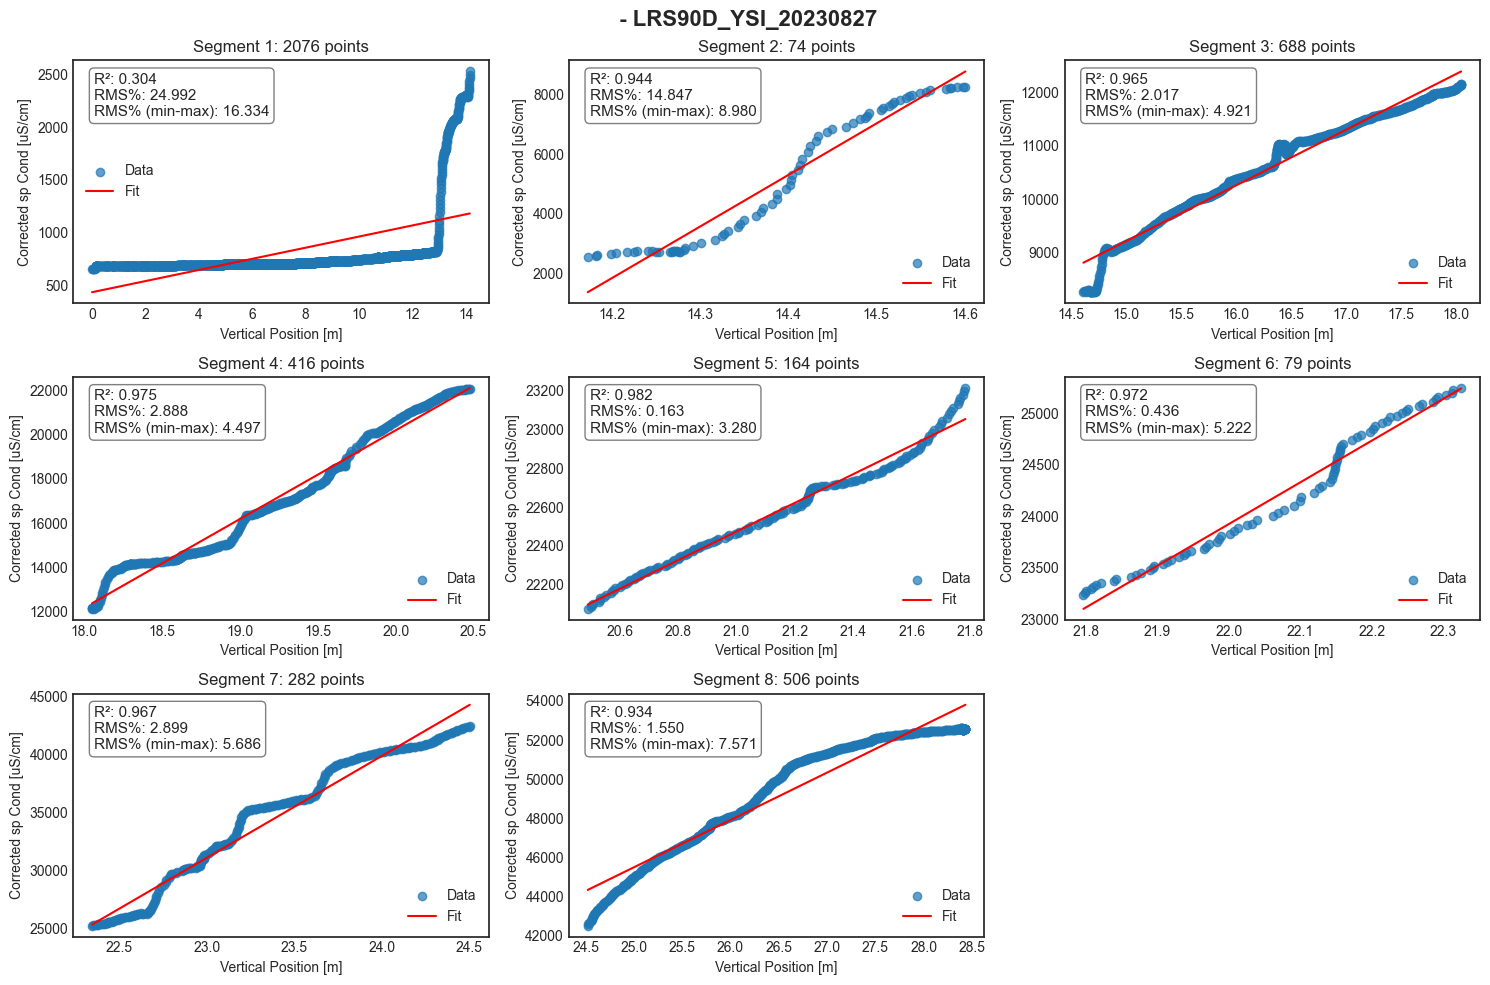

In [14]:
plots.plot_segments(segments, metric_per_segment, title=name)

---

## Other analysis

### 1. Density of points in processed data


In [15]:
width = 1 # meters

density = analysis.calculate_density(x_processed, y_processed, bin_width=width)

In [16]:
# Plot data density
plots.plot_histogram(density,
            value_column='x_bin', 
            weight_column='frequency', 
            num_bins=len(density['x_bin']),
            title=f'Data density histogram (bin width = {width} m) | {name}',
            x_axis_title='Vertical Position [m]',
            bar_color='lightgreen'
            ) 